In [16]:
import numpy as np
import matplotlib.pyplot as plt
from pre_fun import *


In [17]:
# import data

path = r"solutions"



stp1 = Setup.load_setup( path  + r"/imp_diff_1.sim" )
stp2 = Setup.load_setup( path  + r"/imp_diff_2.sim" )
stp3 = Setup.load_setup( path  + r"/imp_diff_3.sim" )
stp4 = Setup.load_setup( path  + r"/imp_diff_4.sim" )

In [18]:
(stp1.input_voltage_data.max() - stp1.input_voltage_data.min())

0.009812537392585207

In [23]:
# calculate FFT

Fvoltage1 = np.fft.fft(stp1.input_voltage_data)[1:int(stp1.N/2)]
freq_ax1 = np.fft.fftfreq(stp1.N, d = stp1.Dt)[1:int(stp1.N/2)]

# anodic current
Fcurrent1 = np.fft.fft(stp2.current_data[0,:])[1:int(stp2.N/2)]

Fvoltage2 = np.fft.fft(stp2.input_voltage_data)[1:int(stp2.N/2)]
freq_ax2 = np.fft.fftfreq(stp2.N, d = stp2.Dt)[1:int(stp2.N/2)]

# anodic current
Fcurrent2 = np.fft.fft(stp3.current_data[0,:])[1:int(stp3.N/2)]

Fvoltage3 = np.fft.fft(stp3.input_voltage_data)[1:int(stp3.N/2)]
freq_ax3 = np.fft.fftfreq(stp3.N, d = stp3.Dt)[1:int(stp3.N/2)]

# anodic current
Fcurrent3 = np.fft.fft(stp3.current_data[0,:])[1:int(stp3.N/2)]

Fvoltage4 = np.fft.fft(stp4.input_voltage_data)[1:int(stp4.N/2)]
freq_ax4 = np.fft.fftfreq(stp4.N, d = stp4.Dt)[1:int(stp4.N/2)]

# anodic current
Fcurrent4 = np.fft.fft(stp4.current_data[0,:])[1:int(stp4.N/2)]

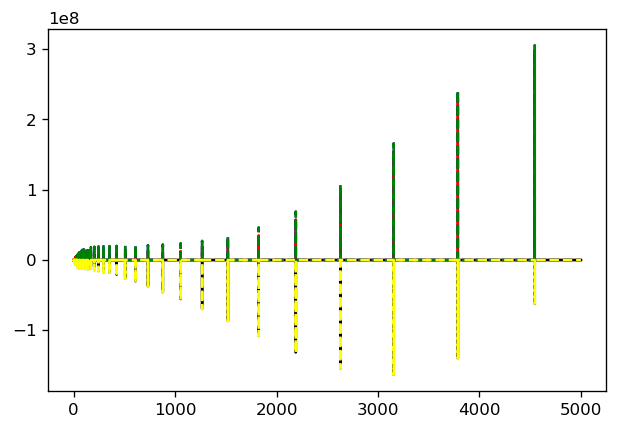

In [20]:
fig = plt.figure(dpi = 120)

ax = fig.add_subplot(1,1,1)

#ax.plot(freq_ax1, Fvoltage1.imag)

ax.plot(freq_ax1, Fcurrent1.imag, color = "red")
ax.plot(freq_ax1, Fcurrent1.real, color = "black")

ax.plot(freq_ax1, Fcurrent2.imag, color = "blue", ls = "--")
ax.plot(freq_ax1, Fcurrent2.real, color = "grey", ls = "--")

ax.plot(freq_ax1, Fcurrent3.imag, color = "green", ls = "--")
ax.plot(freq_ax1, Fcurrent3.real, color = "yellow", ls = "--")

plt.show()

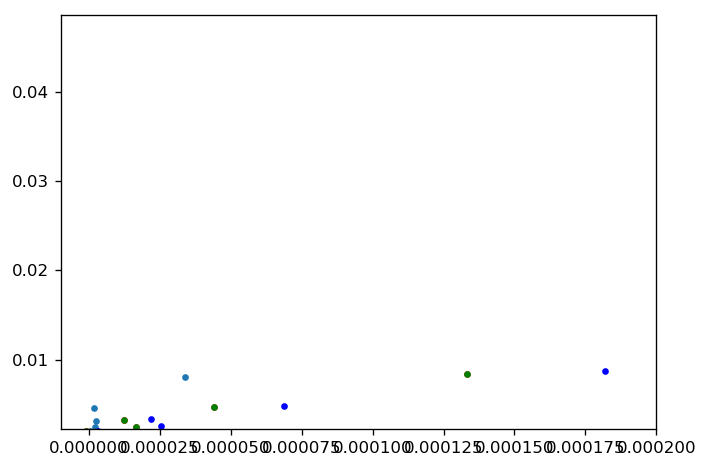

In [39]:
# calculate Impedance

Z1 = Fvoltage1 / Fcurrent1
Z2 = Fvoltage2 / Fcurrent2
Z3 = Fvoltage3 / Fcurrent3
Z4 = Fvoltage4 / Fcurrent4

# Nyquist plot
fig = plt.figure(dpi = 120)

ax = fig.add_subplot(1,1,1)

ax.plot(-Z1.real, Z1.imag, marker = ".", ls = "None")
ax.plot(-Z2.real, Z2.imag, marker = ".", ls = "None", color = "red")
ax.plot(-Z3.real, Z3.imag, marker = ".", ls = "None", color = "green")
ax.plot(-Z4.real, Z4.imag, marker = ".", ls = "None", color = "blue")

#
ax.set_ylim([-1e-4, np.max([Z1.imag,Z2.imag,Z3.imag,Z4.imag])] + 0.05*np.max([Z1.imag,Z2.imag,Z3.imag,Z4.imag]) )
ax.set_xlim([-1e-5,0.0002])

# ax.set_xscale("log")

fig.tight_layout()

plt.show()

# # Bode plot
# fig = plt.figure(dpi = 120)

# ax = fig.add_subplot(1,1,1)

# ax.plot(Dt, np.absolute(Z1), marker = ".", ls = "None")

# fig.tight_layout()

# ax.set_xscale("log")
# ax.set_yscale("log")

# plt.show()

In [7]:
print(np.std(Z.imag) / np.mean(Z.imag) * 100)
print(np.std(Z.real) / np.mean(Z.real) * 100)

3.583127436062223
3.947986414269966
